# O Desafio

A Quantum Finance poosui um modelo ded risco de crédito desatualizado, que tem concedido cartões para um número muito alto de mal pagadores gerando problemas financeiros para a companhia.
Neste contexto, a HEAD de Ciência de Dados chamous os melhores talentos de sua equipe para ajudá-los na construção de um novo modelo que será utilizado antes da conecessão de cartões de crédito aos requerentes. Uma primeira análise feita no dataser mostrou que será necessário despender grande esforço de Feature Engineering antes do desenvolvimento. 
O desafio será realizar melhorias no dataset baseadas nas melhores práticas de Feature Engineering para que , num momento posterior, seja feito o desenvolvimento do modelo.

# Configuração e dependências

É necessário possuir instaladas as dependências abaixo listadas:
- matplotlib
- sweetviz
- pandas
- numpy
- seaborn

## Importando os bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import sweetviz as sv
import math
import pandas as pd
import datetime
import numpy as np
import seaborn as sns

# Formata a impressao dos graficos
%matplotlib inline

# O Data Set

## Importandos o DataSet

In [ ]:
cols=['ID_CLIENTE','TIPO_FUNCIONARIO','DIA_PAGAMENTO','TIPO_ENVIO_APLICACAO', 'QUANT_CARTOES_ADICIONAIS', 'TIPO_ENDERECO_POSTAL', 'SEXO', 'ESTADO_CIVIL', 'QUANT_DEPENDENTES', 'NIVEL_EDUCACIONAL' ,'ESTADO_NASCIMENTO',
      'CIDADE_NASCIMENTO', 'NACIONALIDADE','ESTADO_RESIDENCIAL','CIDADE_RESIDENCIAL','BAIRRO_RESIDENCIAL', 'FLAG_TELEFONE_RESIDENCIAL', 'CODIGO_AREA_TELEFONE_RESIDENCIAL', 'TIPO_RESIDENCIA', 'MESES_RESIDENCIA', 'FLAG_TELEFONE_MOVEL',
      'FLAG_EMAIL', 'RENDA_PESSOAL_MENSAL', 'OUTRAS_RENDAS' ,'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OUTROS_CARTOES', 'QUANT_CONTAS_BANCARIAS', 'QUANT_CONTAS_BANCARIAS_ESPECIAIS', 'VALOR_PATRIMONIO_PESSOAL',
      'QUANT_CARROS', 'EMPRESA', 'ESTADO_PROFISSIONAL', 'CIDADE_PROFISSIONAL', 'BAIRRO_PROFISSIONAL', 'FLAG_TELEFONE_PROFISSIONAL', 'CODIGO_AREA_TELEFONE_PROFISSIONAL', 'MESES_NO_TRABALHO', 'CODIGO_PROFISSAO', 'TIPO_OCUPACAO',
      'CODIGO_PROFISSAO_CONJUGE', 'NIVEL_EDUCACIONAL_CONJUGE', 'FLAG_DOCUMENTO_RESIDENCIAL', 'FLAG_RG', 'FLAG_CPF', 'FLAG_COMPROVANTE_RENDA', 'PRODUTO', 'FLAG_REGISTRO_ACSP', 'IDADE', 'CEP_RESIDENCIAL_3', 'CEP_PROFISSIONAL_3', 'MAU_PAGADOR'
     ]
types_dict={'CEP_RESIDENCIAL_3':int, 'CEP_PROFISSIONAL_3':int}
dados_brutos=pd.read_csv('dataset.txt',encoding = "ISO-8859-1",sep="\t", names=cols, low_memory=False)
dados_brutos.head()

## Descrição do DataSet

Possuimos Um data set com 50 mil entradas e 54 features, de acordo com o [dicionário](descritivo_características.xlsx).

Onde queremos prever a variável MAU_PAGADOR onde 1 é mau pagador e 0 é bom pagador

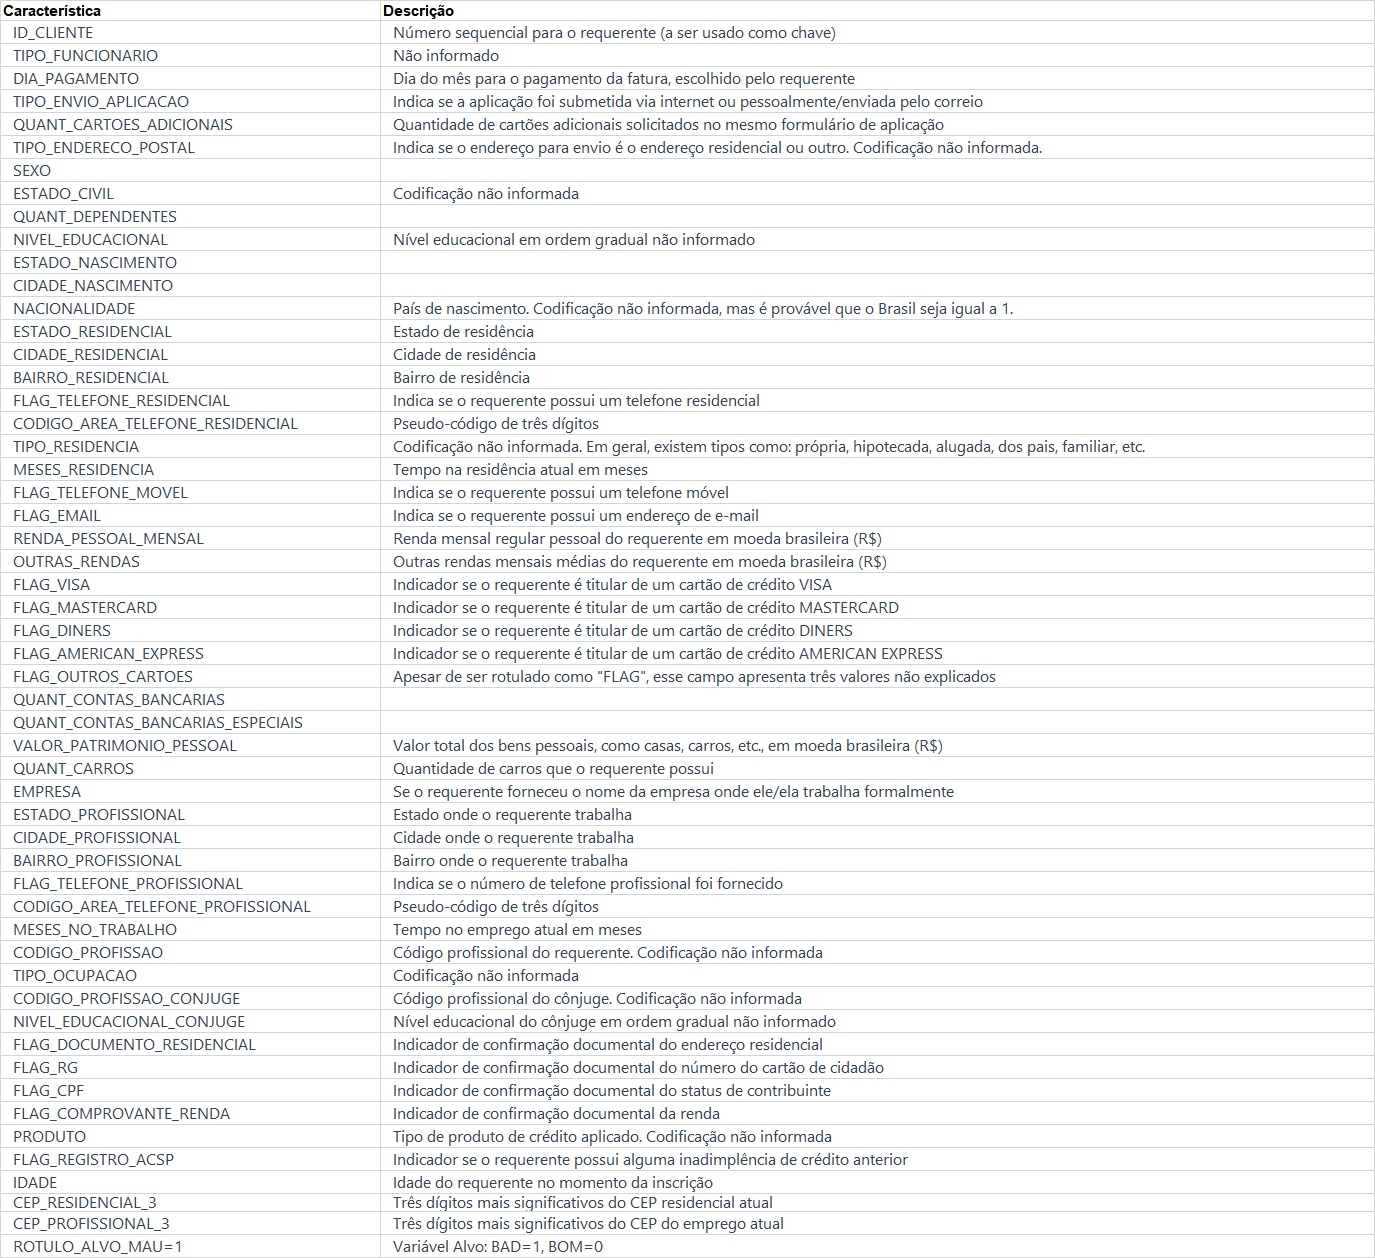!

In [ ]:
dados_brutos.info()

# Preparando o Data Set
Precisamos configurar os tipos corretos para cada coluna. Substitiur os valores inválidos de maneira padronizada. Por exemplo coluna CEP_RESIDENCIAL_3 está como string(object) e possui valores não numéricos como  '#DIV/0!'

## Copiando informações, criando listas e funções necessárioas

In [ ]:
#copiando dados
dados_ajustados=dados_brutos.copy()

#Lista de features desnecessárias
features_to_drop=[]

#Função que une duas lista eliminando réplicas
def Union(lst1, lst2):
    final_list = list(set(lst1) | set(lst2))
    return final_list


#Função que transforma o tipo de uma feature e retorna um dicionario de erros
#df ->dataframe, tranformar as features da lista features para o tipo feature_type 
def find_non_numeric_string(df,feature_type, features):
    error_dict={}
    for feature in features:
        try:
            df[feature].astype(feature_type)
        except Exception as e: 
            error_dict[feature]=e

    return error_dict

def confusion_matrix_custom(y_test,y_pred):
    labels = [0,1]
    label_names = ['BP', 'MP']
    
    cm = confusion_matrix( y_test, y_pred, labels = labels, normalize='true')
    disp = ConfusionMatrixDisplay(cm, display_labels = label_names)
    return disp

In [ ]:
# Use pd.to_numeric to attempt to convert 'CEP_RESIDENCIAL_3' column to numeric values
numeric_mask = pd.to_numeric(dados_ajustados['CEP_RESIDENCIAL_3'], errors='coerce').isna()

# Use the numeric_mask to filter rows where 'a' is not numeric
non_numeric_rows = dados_ajustados[['CEP_RESIDENCIAL_3']][numeric_mask]

# Display the non-numeric rows
print(non_numeric_rows)

In [ ]:
# Use pd.to_numeric to attempt to convert 'a' column to numeric values
numeric_mask = pd.to_numeric(dados_ajustados['CEP_RESIDENCIAL_3'], errors='coerce').isna()

# Use the numeric_mask to filter rows where 'a' is not numeric
non_numeric_rows = dados_ajustados[['CEP_RESIDENCIAL_3']][numeric_mask]

# Display the non-numeric rows
print(non_numeric_rows)

## Configurando tipo bool

Dados do tipo boolean

In [ ]:
boolean_features=['FLAG_TELEFONE_RESIDENCIAL','FLAG_EMAIL','FLAG_TELEFONE_MOVEL','FLAG_VISA','FLAG_MASTERCARD','FLAG_DINERS','FLAG_AMERICAN_EXPRESS','FLAG_AMERICAN_EXPRESS','FLAG_TELEFONE_PROFISSIONAL','FLAG_TELEFONE_RESIDENCIAL', 'FLAG_DOCUMENTO_RESIDENCIAL',
                  'FLAG_RG', 'FLAG_CPF', 'FLAG_COMPROVANTE_RENDA', 'FLAG_REGISTRO_ACSP','MAU_PAGADOR', 'EMPRESA']

dados_ajustados[boolean_features]

Tipos de chave
Features ['FLAG_TELEFONE_MOVEL','FLAG_RG','FLAG_CPF','FLAG_CPF','FLAG_CPF','FLAG_REGISTRO_ACSP'] não tem informações relevantes pois tem apenas uma categoria

In [ ]:
#Adicionando features desnecessárias a lista
features_to_drop=Union(features_to_drop, ['FLAG_TELEFONE_MOVEL','FLAG_RG','FLAG_CPF','FLAG_CPF','FLAG_CPF','FLAG_REGISTRO_ACSP'])

In [ ]:
for feature in boolean_features:
    print(f'valores unicos de {feature}= {dados_ajustados[feature].unique()}')

### Transformando Y/N e 1/0 em True/False

In [ ]:
transformation_dict={'Y':True,'N':False, 1:True, 0:False}

for feature in boolean_features:
    dados_ajustados[feature].replace(transformation_dict,inplace=True)
    
dados_ajustados[boolean_features]

Listando Novas Chaves

In [ ]:
for feature in boolean_features:
    print(f'valores unicos de {feature}= {dados_ajustados[feature].unique()}')

Visualizando Dados Bool

In [ ]:
dados_ajustados[boolean_features].head()

Visualizando info de dados Bool

In [ ]:
dados_ajustados[boolean_features].info()

## Corrigindo Features Categóricas

### Transformando features categóricas em object

In [ ]:
dados_ajustados.info()

Transformando em object as features categóricas que estão como float ou int

In [ ]:
features_to_transform=['DIA_PAGAMENTO','QUANT_CARTOES_ADICIONAIS','TIPO_ENDERECO_POSTAL','ESTADO_CIVIL','NIVEL_EDUCACIONAL','NACIONALIDADE','TIPO_RESIDENCIA','MESES_RESIDENCIA',
                       'FLAG_OUTROS_CARTOES','CODIGO_PROFISSAO','TIPO_OCUPACAO','CODIGO_PROFISSAO_CONJUGE','NIVEL_EDUCACIONAL_CONJUGE','PRODUTO','ID_CLIENTE']

In [ ]:
for feature in features_to_transform:
    dados_ajustados[feature]=dados_ajustados[feature].astype(object)

In [ ]:
dados_ajustados.info()

## Visualizando Features Categoricas

In [ ]:
object_features = dados_ajustados.select_dtypes(include=['object']).columns.tolist()

dados_ajustados[object_features].info()

### Visualizando Chaves por feature

In [ ]:
for feature in object_features:
    print(f'valores unicos de {feature}= {dados_ajustados[feature].unique()}\n')

### Ajustando Chaves da Feature ESTADO_NASCIMENTO

ESTADO_NASCIMENTO= ['RN' 'RJ' 'PE' 'MG' 'BA' 'SP' 'RS' 'CE' 'PA' 'PB' 'MA' ' ' 'GO' 'AC' 'MT'
 'AL' 'AP' 'TO' 'SC' 'PR' 'MS' 'DF' 'PI' 'RO' 'ES' 'AM' 'SE' 'RR' 'XX']

In [ ]:
trans_dict={' ':np.nan,'XX':np.nan}
dados_ajustados['ESTADO_NASCIMENTO'].replace(trans_dict,inplace=True)
dados_ajustados['ESTADO_NASCIMENTO'].unique()

### Ajustando Chaves da Feature TIPO_ENVIO_APLICACAO

valores unicos de TIPO_ENVIO_APLICACAO= ['Web' 'Carga' '0']


In [ ]:
trans_dict={'0':'Pessoalmente'}
dados_ajustados['TIPO_ENVIO_APLICACAO'].replace(trans_dict,inplace=True)
dados_ajustados['TIPO_ENVIO_APLICACAO'].unique()

### Ajustando Chaves da Feature SEXO

valores unicos de SEXO= ['F' 'M' 'N' ' ']


In [ ]:
trans_dict={'N':np.nan,' ':np.nan}
dados_ajustados['SEXO'].replace(trans_dict,inplace=True)
dados_ajustados['SEXO'].unique()

### Ajustando Outras Features

In [ ]:
cat_features_with_problems=['CODIGO_AREA_TELEFONE_RESIDENCIAL','CODIGO_AREA_TELEFONE_PROFISSIONAL','CEP_RESIDENCIAL_3','CEP_PROFISSIONAL_3']
dados_ajustados[cat_features_with_problems].info()

Visualizando valores únicos

Encontrando erros

In [ ]:
error_dict=find_non_numeric_string(dados_ajustados,int,cat_features_with_problems)
print(error_dict)

Os dados categóricos sem informação vamos manter como 'invalido'

In [ ]:
transformation_dict={'#DIV/0!':np.nan,' ':np.nan}
for feature in cat_features_with_problems:
        dados_ajustados[feature].replace(transformation_dict, inplace=True)

In [ ]:
dados_ajustados['CEP_RESIDENCIAL_3'].astype(float).info()

## Dropando Features sem informações

In [ ]:
#Criando lista de features descartadas
features_drop=[]

In [ ]:
n_keys={}
for feature in object_features:
    n_keys[feature]=dados_ajustados[feature].nunique()

n_keys

In [ ]:
n_keys={}
for feature in boolean_features:
    n_keys[feature]=dados_ajustados[feature].nunique()
    
n_keys

As Features ['NIVEL_EDUCACIONAL','QUANT_CARTOES_ADICIONAIS','TIPO_FUNCIONARIO','FLAG_TELEFONE_MOVEL','FLAG_DOCUMENTO_RESIDENCIAL','FLAG_RG','FLAG_CPF', 'FLAG_COMPROVANTE_RENDA', 'FLAG_REGISTRO_ACSP'] só tem uma categoria então vamo deixá-las de lado.



In [ ]:
drop=['NIVEL_EDUCACIONAL','QUANT_CARTOES_ADICIONAIS','TIPO_FUNCIONARIO','FLAG_TELEFONE_MOVEL','FLAG_DOCUMENTO_RESIDENCIAL','FLAG_RG','FLAG_CPF', 'FLAG_COMPROVANTE_RENDA', 'FLAG_REGISTRO_ACSP']
dados_ajustados.drop(columns=drop, inplace=True)

features_drop=Union(features_drop,drop)

As Features 'CIDADE_NASCIMENTO': 9910, 'CIDADE_RESIDENCIAL','BAIRRO_RESIDENCIAL','CIDADE_PROFISSIONAL',BAIRRO_PROFISSIONAL','CODIGO_AREA_TELEFONE_PROFISSIONAL', 'CODIGO_AREA_TELEFONE_RESIDENCIAL', 'CEP_RESIDENCIAL_3', 'CEP_PROFISSIONAL_3' possuem muitas categorias e serão desconsideradas

In [ ]:
drop=['CIDADE_NASCIMENTO', 'CIDADE_RESIDENCIAL','BAIRRO_RESIDENCIAL','CIDADE_PROFISSIONAL','BAIRRO_PROFISSIONAL','CODIGO_AREA_TELEFONE_PROFISSIONAL', 
      'CODIGO_AREA_TELEFONE_RESIDENCIAL', 'CEP_RESIDENCIAL_3', 'CEP_PROFISSIONAL_3','ID_CLIENTE',]
dados_ajustados.drop(columns=drop, inplace=True)

features_drop=Union(features_drop,drop)

Agora podemos ver o Número de Entradas com dados faltantes

In [ ]:
dados_ajustados.info()

# Avaliação Inicial
Definição do K ótimo e do Recall base para comparação da base somente com variáveis numéricas

## Definição de K ótimo  

### Separando dados em X_train, X_test,y_train,y_test somente com variáveis numéricas e booleanas

In [ ]:
from sklearn.model_selection import train_test_split

object_features = dados_ajustados.select_dtypes(include=['object']).columns.tolist()

X=dados_ajustados.drop('MAU_PAGADOR', axis=1)
X=X.drop(object_features,axis=1)
y=dados_ajustados['MAU_PAGADOR']

X.info()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)

### Avaliando modelo com diferents Ks

Como queremos minimizar crédito dados a pagadores ruins, classificaremos os modelos pelo recall)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,  accuracy_score, recall_score

recall=[]
scores=[]

## Celula comentado para evitar processamento descencessário. Imagens abaixo em células Markdown
# recall=[]
# scores=[]

# k_range = range(1, 20,1)

# for k in k_range:
#     Classif_KNN = KNeighborsClassifier(n_neighbors=k)
#     Classif_KNN.fit(X_train, y_train)
#     y_pred = Classif_KNN.predict(X_test)
#     y_pred_train=Classif_KNN.predict(X_train)
#     recall.append(recall_score(y_test, y_pred, average=None)[1])
#     scores.append(accuracy_score(y_test, y_pred))

In [ ]:
## Celula comentado para eviotar processamento desnecessário. Imagens abaixo em células Markdown

#Plota e salva os valores de acc. em função do valor escolhido de K
# plt.plot(k_range, recall)
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Testing Recall')

# plt.savefig("Recall.png")

Recall em função de K

![Recall](Recall.png)

In [ ]:
## Celula comentado para eviotar processamento desnecessário. Imagens abaixo em células Markdown

# #Plota os valores de acc. em função do valor escolhido de K
# plt.plot(k_range, scores)
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Testing Accuracy')
# # plt.savefig("accuracy.png")

Accuracy em função de K

![Accuracy](accuracy.png)

### Escolha de K ótimo

k=1, para balancear entre recall de Mau Pagador alto(poucos falso positivos) e acurácia alta

In [ ]:
k=1

Classif_KNN = KNeighborsClassifier(n_neighbors=k)
Classif_KNN.fit(X_train, y_train)
y_pred = Classif_KNN.predict(X_test)
recall.append(recall_score(y_test, y_pred, average=None)[1])

## Avaliação

In [ ]:
#Salvando dict com matriz de confusão
aval_dict={}

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = [0,1]
label_names = ['BP', 'MP']

disp = confusion_matrix_custom(y_test, y_pred)
disp.plot()

aval_dict['0 - inicial']=disp

# Análise Exploratória


Excluir variáveis através de análise exploratória (distribuição das variáveis)
Pensar Agrupamento de variáveis categóricas através da análise exploratória
Pensar Inputação através da análise exploratória

## Variáveis Categóricas

In [ ]:
dados_ajustados.info()

In [ ]:
categorical_features = dados_ajustados.select_dtypes(include=['bool','object']).columns.tolist()
categorical_features

### Histograma

In [ ]:
# Análise das variáveis qualitativas
# features=categorical_features[0:10]
features=categorical_features
fig,axs=plt.subplots(nrows=math.ceil(len(categorical_features)/3), ncols=3, figsize=(18,len(categorical_features)*3))

for col, ax in zip(features[0:], axs.ravel()):
    x=dados_ajustados.loc[:, col]
    ax.set_xlabel(col)
    sns.countplot(x=x, ax=ax, orient='v')
    plt.subplots_adjust(top=0.92,bottom=0.08, left=0.10,right=0.95,hspace=0.25,wspace=0.4)

plt.show()

### Teste Chi Quadrado

In [ ]:
#Selecionando features categoricas para teste Chi Quadrado
categorical_features = dados_ajustados.select_dtypes(include=['bool','object']).columns.tolist()
categorical_features

In [ ]:
from scipy.stats import chi2_contingency

explainer_categorical_features=categorical_features.copy()
explainer_categorical_features.remove('MAU_PAGADOR')

independent_features=[]
dependent_features=[]


alpha = 0.05
for feature in explainer_categorical_features:
    contigency= pd.crosstab(dados_ajustados[feature], dados_ajustados['MAU_PAGADOR']).reset_index(drop=True)
    stat, p, dof, expected = chi2_contingency(contigency)
    print(f'Teste Qui Quadrado entre MAU_PAGADOR e {feature}')
    print(f"p value = " + str(p))
    

    if p <= alpha:
        print(f'MAU_PAGADOR e {feature} são dependentes (reject H0)\n')
        dependent_features.append(feature)
    else:
        print(f'MAU_PAGADOR e {feature} são independentes (H0 holds true)\n')
        independent_features.append(feature)
        
print(f'Features independentes em relação a MAU PAGADOR {independent_features}\n')
print(f'Features dependentes em relação a MAU PAGADOR {dependent_features}')

## Variáveis Numéricas

In [ ]:
numerical_features = dados_ajustados.select_dtypes(include=['float64','int64']).columns.tolist()
dados_ajustados[numerical_features].describe()

### Visualização em Histograma

In [ ]:
# Análise exploratória dos dados usando o gráfico histograma
# configurando figure
n_cols=2
n_rows=nrows=math.ceil(len(numerical_features)/n_cols)
fig,axs=plt.subplots(nrows=n_rows,
                     ncols=n_cols,
                     figsize=(18,n_rows*6))

for col, ax in zip(numerical_features[0:], axs.ravel()):
    x=dados_ajustados.loc[:, col]
    ax.set_xlabel(col)
    # ax.axvline(x=outlier_limits.loc[col]['upper_limit'], color='r', label='Upper limit')
    # ax.axvline(x=outlier_limits.loc[col]['lower_limit'], color='g', label='lower limit')
    ax.axvline(x=x.mean(), color='b', label='Mean')
    sns.distplot(x, ax=ax, color="blue", kde=False)
    ax.legend()
    plt.subplots_adjust(top=0.92,bottom=0.08, left=0.10,right=0.95,hspace=0.5,wspace=0.4)

plt.show()

### Visualização em boxplot

Vamos analisar as features ['RENDA_PESSOAL_MENSAL',
                       'OUTRAS_RENDAS',
                       'VALOR_PATRIMONIO_PESSOAL',
                       'MESES_NO_TRABALHO']
                    
                    
Quase a totalidade das entradas tem valor 0 nessas features. Provavelmente é um erro de entrada e devemos avaliar essas features.

In [ ]:
sns.boxplot(data=dados_ajustados[['RENDA_PESSOAL_MENSAL',
                       'OUTRAS_RENDAS',
                       ]],
            orient='h',
           )

In [ ]:
sns.boxplot(data=dados_ajustados['VALOR_PATRIMONIO_PESSOAL'],
            orient='h',
           ).set_title("Valor Patrimonio Pessoal")

In [ ]:
sns.boxplot(data=dados_ajustados['MESES_NO_TRABALHO'],
            orient='h'
           ).set_title("Meses no Trabalho")




A Variável quantidade de dependentes também tem outliers - Existem uma entrada com 53 dependentes

In [ ]:
dados_ajustados[dados_ajustados['QUANT_DEPENDENTES']>=53]
                
                

In [ ]:
dados_ajustados[dados_ajustados['QUANT_DEPENDENTES']<53]['QUANT_DEPENDENTES'].hist()

### Coeficiente de Pearson

In [ ]:
dados_ajustados.info()

In [ ]:
sns.heatmap(dados_ajustados.corr(numeric_only=True))

# Inputação de Dados
Dropar Features com mais de 20% de missing values

Inputar variáveis categóricas pela moda

Estudar utilizar modelo não supervisionado para inputar (KNN) - https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/

Temos as seguintes Features com dados faltantes

In [ ]:
## Copiando df para dados
dados=dados_ajustados.copy()

In [ ]:
missingValues_features=dados.isnull().any()[dados.isnull().any()==True].index.to_list()
dados[missingValues_features].info()

## Informações do conjuge


As Features CODIGO_PROFISSAO_CONJUGE e NIVEL_EDUCACIONAL_CONJUGE tem mais de 20% de missing values e serão descartadas

In [ ]:
dados.drop(columns=['CODIGO_PROFISSAO_CONJUGE', 'NIVEL_EDUCACIONAL_CONJUGE'],inplace=True)
missingValues_features=dados.isnull().any()[dados.isnull().any()==True].index.to_list()
dados[missingValues_features].info()

## Inputação pela Moda

As variáveis ['SEXO','TIPO_RESIDENCIA','CODIGO_PROFISSAO', 'TIPO_OCUPACAO'] vão ser substituidas pela moda.

As váriaveis ['MESES_RESIDENCIA','ESTADO_NASCIMENTO'] será descartada por não terem um moda forte.

Vamos inputar pela moda, nossos clientes são majoritariamente femininos,

In [ ]:
drop=['MESES_RESIDENCIA','ESTADO_NASCIMENTO'] 
features_drop=Union(features_drop,drop)

In [ ]:
for feature in missingValues_features:
    print(dados[feature].value_counts(normalize =True).round(2))
    print('\n')

In [ ]:
#Inputando pela moda e salvando as informação de inputação em input_dict={
input_dict={}

for feature in missingValues_features:
    input_=dados[feature].mode()[0]
    dados[feature]=dados[feature].fillna(input_)
    input_dict[feature]=input_
    
dados[missingValues_features].info()  

In [ ]:
##Transformando as features  em objects novamente
missingValues_features
for column in missingValues_features:
    dados[column]=dados[column].astype(object)
                        
dados[missingValues_features].info()  

# Codificação e Dumetização

dumetizar tudo


features_to_transform=['DIA_PAGAMENTO','QUANT_CARTOES_ADICIONAIS','TIPO_ENDERECO_POSTAL','ESTADO_CIVIL','NIVEL_EDUCACIONAL','NACIONALIDADE','TIPO_RESIDENCIA','MESES_RESIDENCIA',
                       'FLAG_OUTROS_CARTOES','CODIGO_PROFISSAO','TIPO_OCUPACAO','CODIGO_PROFISSAO_CONJUGE','NIVEL_EDUCACIONAL_CONJUGE','PRODUTO']

In [ ]:
to_dummy_features = dados.select_dtypes(include=['object']).columns.tolist()
to_dummy_features
to_dummy_features

In [ ]:
for feature in to_dummy_features:
    print(f'{feature} - chaves: {dados[feature].unique()}')

## Dumetizando Dados

In [ ]:
X=dados.drop('MAU_PAGADOR', axis=1)
y=dados['MAU_PAGADOR']

for feature in to_dummy_features:
    aux = pd.get_dummies(X[feature],drop_first=False)
    X.drop([feature],axis=1,inplace=True)
    X=pd.concat([X,aux],axis=1)
    
X.columns = X.columns.astype(str) 
X.info()

Separando em test e Train

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)

## Avaliação

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Classif_KNN = KNeighborsClassifier(n_neighbors=k)
Classif_KNN.fit(X_train, y_train)
y_pred = Classif_KNN.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = confusion_matrix_custom(y_test, y_pred).plot()

aval_dict['1 - Inputação']=disp

In [ ]:
for key in aval_dict:
    aval_dict[key].plot()
    plt.title(f'Confusion matrix of {key}')

## Agrupando Features numéricas em  categorias
['VALOR_PATRIMONIO_PESSOAL','MESES_NO_TRABALHO','QUANT_DEPENDENTES','RENDA_PESSOAL_MENSAL','OUTRAS_RENDAS']

In [ ]:
features_CATEGORIZE=['VALOR_PATRIMONIO_PESSOAL','MESES_NO_TRABALHO','QUANT_DEPENDENTES','RENDA_PESSOAL_MENSAL','OUTRAS_RENDAS']

In [ ]:
#Copíando dados
dados_agrupados=dados.copy()

### Categorizando ['VALOR_PATRIMONIO_PESSOAL','MESES_NO_TRABALHO',','RENDA_PESSOAL_MENSAL','OUTRAS_RENDAS']

Muito valores 0 são e vamos considerá-los como ausentes

In [ ]:
dados[dados['VALOR_PATRIMONIO_PESSOAL']>0][['VALOR_PATRIMONIO_PESSOAL']].describe()
# Bin edges must be unique:

In [ ]:
dados_agrupados["patrimonio_bins"] = pd.cut(
        x=dados_agrupados["VALOR_PATRIMONIO_PESSOAL"],
        bins=[-1, 1,3e+04,5e+5, np.inf],
        labels=["Patrimonio Não informado", "Patrimonio Baixo", "Patrimonio Medio", "Patrimonio Alto"]
        )

dados_agrupados["patrimonio_bins"].value_counts().plot(kind='bar')    
# data['Points'].value_counts().plot(ax=ax, kind='bar')

### Categorizando MESES_NO_TRABALHO

In [ ]:
dados[dados['MESES_NO_TRABALHO']>0][['MESES_NO_TRABALHO']].plot(kind='hist',bins=5)

In [ ]:
dados_agrupados["meses_bins"] = pd.cut(
        x=dados_agrupados["MESES_NO_TRABALHO"],
        bins=[-1, 1,6,12, np.inf],
        labels=["meses no trabalho não informado", "<6 meses no trabalho", "< 1 ano no trabalho ", ">1 ano no trabalho"]
        )

dados_agrupados["meses_bins"].value_counts().plot(kind='bar')   

'RENDA_PESSOAL_MENSAL'

In [ ]:
feature='RENDA_PESSOAL_MENSAL'
dados[feature].describe()

In [ ]:
dados_agrupados[feature+"_bins"] = pd.qcut(
        x=dados_agrupados[feature],
        q=4,
        labels=['1º Quartil','2º Quartil','3º Quartil','4º Quartil']
        )

dados_agrupados[feature+"_bins"].value_counts().plot(kind='bar')   

'OUTRAS_RENDAS'

In [ ]:
feature='OUTRAS_RENDAS'
dados[dados[feature]>0][feature].describe()

In [ ]:
dados_agrupados[feature+"_bins"] = pd.cut(
        x=dados_agrupados[feature],
        bins=[-50, 1,400,1000, np.inf],
        labels=['Outras renda não informada',"Outras renda baixa", "Outras renda media", "Outras renda alta"]
        )

dados_agrupados[feature+"_bins"].value_counts().plot(kind='bar')   

### Avaliando


In [ ]:
X=dados.drop('MAU_PAGADOR', axis=1)
y=dados['MAU_PAGADOR']

for feature in to_dummy_features:
    aux = pd.get_dummies(X[feature],drop_first=False)
    X.drop([feature],axis=1,inplace=True)
    X=pd.concat([X,aux],axis=1)
    
X.columns = X.columns.astype(str) 
X.info()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Classif_KNN = KNeighborsClassifier(n_neighbors=k)
Classif_KNN.fit(X_train, y_train)
y_pred = Classif_KNN.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = confusion_matrix_custom(y_test, y_pred).plot()

aval_dict['1.1 - agrupamento']=disp

# Scalling dos Dados
Testar e avaliar para todos:
* Standard
* Robust Scaller
* min/max



## Normalização - Standard Scaling


In [ ]:
numerical_features = dados.select_dtypes(include=['float64','int64']).columns.tolist()
numerical_features

### Scaling individual

Fazendo o Scaling uma feature de cada vez

In [ ]:
from sklearn.preprocessing import StandardScaler

#Separando os dados
X_train_StandardScaled,X_test_StandardScaled,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)

#Treinando o modelo
Classif_KNN = KNeighborsClassifier(n_neighbors=k)
Classif_KNN.fit(X_train_StandardScaled, y_train)
y_pred = Classif_KNN.predict(X_test_StandardScaled)

#Printando o recall para comparação
print((recall_score(y_test, y_pred, average=None)[1]))

#Scalling individual de cada feature
chosen_scaler=StandardScaler

for column in numerical_features:
    X_train_StandardScaled,X_test_StandardScaled,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = chosen_scaler().fit(X_train_StandardScaled[column].values.reshape(-1, 1))

    X_train_StandardScaled[column] = scaler.transform(X_train_StandardScaled[column].values.reshape(-1, 1))
    X_test_StandardScaled[column] = scaler.transform(X_test_StandardScaled[column].values.reshape(-1, 1))
    Classif_KNN = KNeighborsClassifier(n_neighbors=k)
    Classif_KNN.fit(X_train_StandardScaled, y_train)
    y_pred = Classif_KNN.predict(X_test_StandardScaled)
    print(f'Feature com Scalling: {column}\nRecall = {recall_score(y_test, y_pred, average=None)[1]}')

### Preparo

In [ ]:
from sklearn.preprocessing import StandardScaler

# X_train_StandardScaled,X_test_StandardScaled,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)
# scaler = StandardScaler().fit(X_train_StandardScaled)

# X_train_StandardScaled = scaler.transform(X_train_StandardScaled)
# X_test_StandardScaled = scaler.transform(X_test_StandardScaled)

# Scalling somente em variaveis numericas
X_train_StandardScaled,X_test_StandardScaled,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler().fit(X_train_StandardScaled[numerical_features])

X_train_StandardScaled[numerical_features] = scaler.transform(X_train_StandardScaled[numerical_features])
X_test_StandardScaled[numerical_features] = scaler.transform(X_test_StandardScaled[numerical_features])

### Treino

In [ ]:
Classif_KNN = KNeighborsClassifier(n_neighbors=k)
Classif_KNN.fit(X_train_StandardScaled, y_train)
y_pred = Classif_KNN.predict(X_test_StandardScaled)
print((recall_score(y_test, y_pred, average=None)[1]))

### Avaliação

In [ ]:
disp = confusion_matrix_custom(y_test, y_pred).plot()
aval_dict['2 - Standard Scaler']=disp

In [ ]:
for key in aval_dict:
    aval_dict[key].plot()
    plt.title(f'Confusion matrix of {key}')

Scaling uma a uma

## Min/Max Scaling

### Scaling individual

Fazendo o Scaling uma feature de cada vez

In [ ]:
from sklearn.preprocessing import MinMaxScaler

chosen_scaler= MinMaxScaler

for column in numerical_features:
    #Split dos dados
    X_train_Scaled,X_test_Scaled,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)
    #Fit do scaler
    scaler = chosen_scaler().fit(X_train_Scaled[column].values.reshape(-1, 1))
    #Scallin dos dados
    X_train_Scaled[column] = scaler.transform(X_train_Scaled[column].values.reshape(-1, 1))
    X_test_Scaled[column] = scaler.transform(X_test_Scaled[column].values.reshape(-1, 1))
    #Treinamento do modelo
    Classif_KNN = KNeighborsClassifier(n_neighbors=k)
    Classif_KNN.fit(X_train_Scaled, y_train)
    #Predição
    y_pred = Classif_KNN.predict(X_test_Scaled)
    #Avaliação
    print(f'Feature com Scalling: {column}\nRecall = {recall_score(y_test, y_pred, average=None)[1]}')

### Preparo

In [ ]:
#Escalando só numéricas
from sklearn.preprocessing import MinMaxScaler

X_train_MinMaxScaled,X_test_MinMaxScaled,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)
scaler = MinMaxScaler().fit(X_train_MinMaxScaled[numerical_features])

X_train_MinMaxScaled[numerical_features] = scaler.transform(X_train_MinMaxScaled[numerical_features])
X_test_MinMaxScaled[numerical_features] = scaler.transform(X_test_MinMaxScaled[numerical_features])

### Treino

In [ ]:
#Treino do modelo
Classif_KNN = KNeighborsClassifier(n_neighbors=k)
Classif_KNN.fit(X_train_MinMaxScaled, y_train)

#Predição
y_pred = Classif_KNN.predict(X_test_MinMaxScaled)

#Avaliação
print("Recall =", (recall_score(y_test, y_pred, average=None)[1]))
print('Accuracy',(accuracy_score(y_test, y_pred)))

### Avaliação

In [ ]:
disp = confusion_matrix_custom(y_test, y_pred)
aval_dict['3 - Min/Max Scaler']=disp

for key in aval_dict:
    aval_dict[key].plot()
    plt.title(f'Confusion matrix of {key}')

## Robust Scaling

### Scaling Individual
Fazendo o Scaling uma feature de cada vez

In [ ]:
from sklearn.preprocessing import RobustScaler

chosen_scaler=  RobustScaler

for column in numerical_features:
    #Split dos dados
    X_train_Scaled,X_test_Scaled,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)
    
    #Fit do scaler
    scaler = chosen_scaler().fit(X_train_Scaled[column].values.reshape(-1, 1))
    
    #Scallin dos dados
    X_train_Scaled[column] = scaler.transform(X_train_Scaled[column].values.reshape(-1, 1))
    X_test_Scaled[column] = scaler.transform(X_test_Scaled[column].values.reshape(-1, 1))
    
    #Treinamento do modelo
    Classif_KNN = KNeighborsClassifier(n_neighbors=k)
    Classif_KNN.fit(X_train_Scaled, y_train)
    
    #Predição
    y_pred = Classif_KNN.predict(X_test_Scaled)
    
    #Avaliação
    print(f'Feature com Scalling: {column}\nRecall = {recall_score(y_test, y_pred, average=None)[1]}')

### Preparo

In [ ]:
X_train_RobustScaled,X_test_RobustScaled,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)
scaler = RobustScaler().fit(X_train_RobustScaled[numerical_features])

X_train_RobustScaled[numerical_features] = scaler.transform(X_train_RobustScaled[numerical_features])
X_test_RobustScaled[numerical_features] = scaler.transform(X_test_RobustScaled[numerical_features])

### Treino

In [ ]:
Classif_KNN = KNeighborsClassifier(n_neighbors=k)
Classif_KNN.fit(X_train_RobustScaled, y_train)
y_pred = Classif_KNN.predict(X_test_RobustScaled)
print((recall_score(y_test, y_pred, average=None)[1]))

### Avaliação

In [ ]:
disp = confusion_matrix_custom(y_test, y_pred)
aval_dict['4 - Robust Scaler']=disp

for key in aval_dict:
    aval_dict[key].plot()
    plt.title(f'Confusion matrix of {key}')

## Conclusão
A melhor Scalling encontrada foi min max scaller com recall de 3%

O scalling de features individualmente não nos deu insights sobre e eficacia do scaling delas separadamente e não teve correlação com o scaling total

# Redução de Dimensionalidade 
Reduzir Dados Com PCA

## Modelo com redução de dimensionalidade
Objetivo diminuir o número de Features

In [ ]:
from sklearn.decomposition import PCA

#Redução de variáveis
pca = PCA(n_components=2,random_state=2)
pca_2d_train = pca.fit_transform(X_train_MinMaxScaled)
pca_2d_test = pca.transform(X_test_MinMaxScaled)

# Visualização de variáveis reduzidas
sns.scatterplot(x=pca_2d_train[:,0],y=pca_2d_train[:,1], hue=y_train,)

In [ ]:
#Calculando melhor N
recall=[]
n_range=range(2,11)

for n in n_range:
    #Redução de variáveis
    pca = PCA(n_components=n,random_state=2)
    pca_2d_train = pca.fit_transform(X_train_MinMaxScaled)

    pca_2d_test = pca.transform(X_test_MinMaxScaled)
    
    #Treinando modelo
    Classif_KNN = KNeighborsClassifier(n_neighbors=k)
    Classif_KNN.fit(pca_2d_train, y_train)

    #Prevendo valores            
    y_pred = Classif_KNN.predict(pca_2d_test)
    recall.append(recall_score(y_test, y_pred, average=None)[1])

#Plota e salva os valores de acc. em função do valor escolhido de K
plt.plot(n_range, recall)
plt.xlabel('Value of N for KNN')
plt.ylabel('Testing Recall')

In [ ]:
#Redução de variáveis
pca = PCA(n_components=5)
pca_2d_train = pca.fit_transform(X_train_MinMaxScaled)

pca_2d_test = pca.transform(X_test_MinMaxScaled)

#Treinando modelo
Classif_KNN = KNeighborsClassifier(n_neighbors=k)
Classif_KNN.fit(pca_2d_train, y_train)

#Prevendo valores            
y_pred = Classif_KNN.predict(pca_2d_test)
print(recall_score(y_test, y_pred, average=None)[1])

#Salvando informações
disp = confusion_matrix_custom(y_test, y_pred)
aval_dict['5 - PCA']=disp

for key in aval_dict:
    aval_dict[key].plot()
    plt.title(f'Confusion matrix of {key}')


Não obtivemos beneficios em fazer a redução de dimensionalidade então manteremos os dados escalonados pelo min/max

# Exclusão de Outliers

limites de Quant_dependente = media +- 1,5*IQQ

['RENDA_PESSOAL_MENSAL','OUTRAS_RENDAS','VALOR_PATRIMONIO_PESSOAL','MESES_NO_TRABALHO'] - foram categorizadas então vamos dedsconsider-a-las como variáveis numpericas



## QUANT_DEPENDENTES

In [ ]:
def calculate_bounds(df, column_name):
    # Calculate the IQR (Interquartile Range)
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1

    # Calculate the upper and lower bounds
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    return lower_bound, upper_bound

In [ ]:
def remove_outliers(lower_bound,upper_bound,X,y,column):
    X_new=X.copy()
    y_new=y.copy()

    X_new.reset_index(inplace=True, drop=True)
    y_new.reset_index(inplace=True, drop=True)
    
    mask=(X_new[column]>=lower_bound) & (X_new[column] <= upper_bound)
    X_new=X_new[mask].copy()
    y_new=y_new.loc[X_new.index]
    
    X_new.reset_index(inplace=True, drop=True)
    y_new.reset_index(inplace=True, drop=True)
    
    return X_new,y_new
    

In [ ]:
#Calculando limites
bounds=calculate_bounds(X_train_MinMaxScaled,'QUANT_DEPENDENTES')
bounds

In [ ]:
#Limpando dados
X_train_OutliersTreatment,y_train_OutliersTreatment=remove_outliers(bounds[0],bounds[1],X_train_MinMaxScaled,y_train,'QUANT_DEPENDENTES')

In [ ]:
#Treinando modelo
Classif_KNN = KNeighborsClassifier(n_neighbors=k)
Classif_KNN.fit(X_train_OutliersTreatment, y_train_OutliersTreatment)
y_pred = Classif_KNN.predict(X_test_MinMaxScaled)
print("Recall = ",(recall_score(y_test, y_pred, average=None)[1]))
disp = confusion_matrix_custom(y_test, y_pred)

### Avaliação

In [ ]:
# Salvando avaliação
disp = confusion_matrix_custom(y_test, y_pred)
aval_dict['5 - Outlier Treatment: QUANT_DEPENDENTES']=disp

for key in aval_dict:
    aval_dict[key].plot()
    plt.title(f'Confusion matrix of {key}')

Recall Não melhorou com a exclusão de outliers da feature QUANT_Dependentes

# Exclusão de Features duplicadas

As features ['RENDA_PESSOAL_MENSAL','OUTRAS_RENDAS','VALOR_PATRIMONIO_PESSOAL','MESES_NO_TRABALHO'] foram transformadas em variáveis categóricas através da criação de bins no item Codificação e Dumetização e devem ser desconsideradas

In [ ]:
# X_train2=X_train_OutliersTreatment.drop(columns=['RENDA_PESSOAL_MENSAL','OUTRAS_RENDAS','VALOR_PATRIMONIO_PESSOAL','MESES_NO_TRABALHO'])
X_train_droped_columns=X_train_MinMaxScaled.drop(columns=['RENDA_PESSOAL_MENSAL','OUTRAS_RENDAS','VALOR_PATRIMONIO_PESSOAL','MESES_NO_TRABALHO'])
X_test_droped_columns=X_test_MinMaxScaled.drop(columns=['RENDA_PESSOAL_MENSAL','OUTRAS_RENDAS','VALOR_PATRIMONIO_PESSOAL','MESES_NO_TRABALHO'])

# df.drop(columns=['B', 'C'])

In [ ]:
#Treinando modelo
Classif_KNN = KNeighborsClassifier(n_neighbors=k)
Classif_KNN.fit(X_train_droped_columns, y_train)
y_pred = Classif_KNN.predict(X_test_droped_columns)
print((recall_score(y_test, y_pred, average=None)[1]))
disp = confusion_matrix_custom(y_test, y_pred)



# X_train_OutliersTreatment,y_train_OutliersTreatment=remove_outliers(bounds[0],bounds[1],X_train_MinMaxScaled,y_train,'QUANT_DEPENDENTES')

## Avaliação

In [ ]:
# Salvando avaliação
disp = confusion_matrix_custom(y_test, y_pred)
aval_dict['6 - Droped columns']=disp

for key in aval_dict:
    aval_dict[key].plot()
    plt.title(f'Confusion matrix of {key}')